# Dependencies

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
import csv

# Simulation Parameters

In [32]:
m = 1.0     # Mass
k = 1.0     # Spring constant
f0 = 1.0    # Driving force amplitude
Omega = np.linspace(0.01, 3.0, 500)  # Driving frequency range
dt = 0.001   # Time step
T = 100.0   # Total simulation time
N = int(T / dt)
times = np.linspace(0, T, N)

## Plot Parameters

In [4]:
# Set font sizes globally
plt.rcParams['font.size'] = 16  # General font size
plt.rcParams['axes.titlesize'] = 20  # Title font size
plt.rcParams['axes.labelsize'] = 18  # Label font size (xlabel, ylabel)
plt.rcParams['xtick.labelsize'] = 14  # Font size for x-axis tick labels
plt.rcParams['ytick.labelsize'] = 14  # Font size for y-axis tick labels
plt.rcParams['legend.fontsize'] = 16  # Legend font size

# Functions

In [5]:
# used in a
def stationary_amplitudes(Omega, k, m, f0):
    denominator = (2 * k - m * Omega**2)**2 - k**2
    A1 = f0 * (2 * k - m * Omega**2) / denominator
    A2 = f0 * k / denominator
    return A1, A2

# used in c
def velocity_verlet(x1, x2, v1, v2, dt, f0, Omega, k, m, N):

    x1_values = []
    x2_values = []

    for i in range(N):
        t = i * dt
        # Forces
        f1 = f0 * np.cos(Omega * t) - 2 * k * x1 + k * x2
        f2 = -2 * k * x2 + k * x1
        # Update velocities and positions
        v1_half = v1 + 0.5 * dt * f1 / m
        v2_half = v2 + 0.5 * dt * f2 / m
        x1 += v1_half * dt
        x2 += v2_half * dt
        f1_new = f0 * np.cos(Omega * t) - 2 * k * x1 + k * x2
        f2_new = -2 * k * x2 + k * x1
        v1 = v1_half + 0.5 * dt * f1_new / m
        v2 = v2_half + 0.5 * dt * f2_new / m
        
        x1_values.append(x1)
        x2_values.append(x2)
    return np.array(x1_values), np.array(x2_values)


# used in d
def analytical_energy(t, f0, k):
    # Analytical energy for a harmonic oscillator driven at resonance
    E_kin = 0.5 * m * (f0 * np.cos(np.sqrt(k/m) * t))**2
    E_pot = 0.5 * k * (f0 * np.cos(np.sqrt(k/m) * t))**2
    return E_kin + E_pot

# used in e
def fft_analysis(signal, dt):
    N = len(signal)
    freq = fftfreq(N, dt)
    spectrum = np.abs(fft(signal)) / N
    return freq[:N//2], spectrum[:N//2]

# Analytical amplitude function used in e
def analytical_amplitude(Omega, k, f0):
    return f0 / np.sqrt((k - m * Omega**2)**2)

# 1a

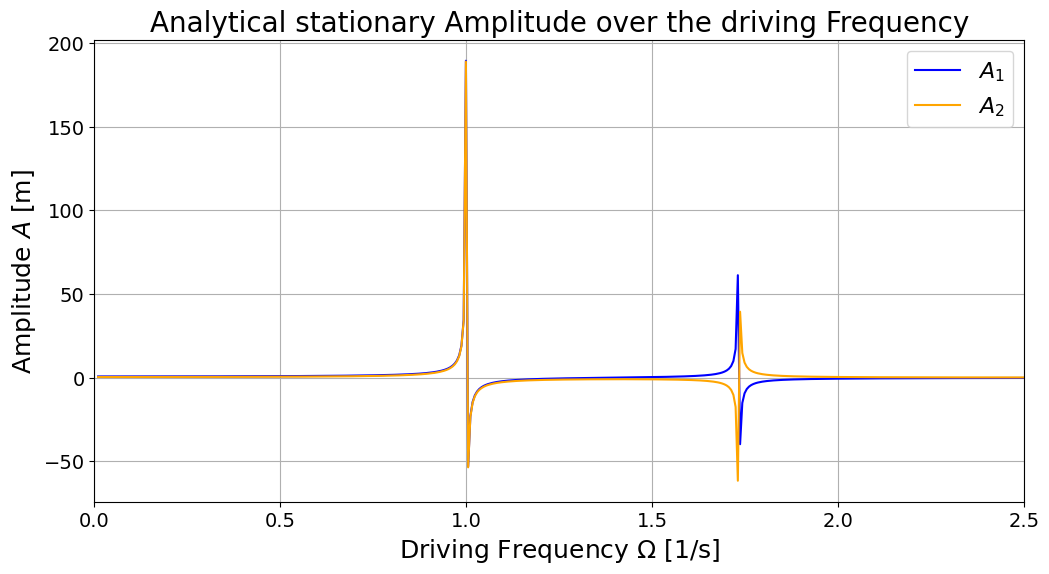

In [ ]:
A1_analytical, A2_analytical = stationary_amplitudes(Omega, k, m, f0)

# Plot the analytical amplitude
plt.figure(figsize=(12, 6))
plt.plot(Omega, A1_analytical, label="$A_1$", color='blue')
plt.plot(Omega, A2_analytical, label="$A_2$", color='orange')
plt.xlabel(f"Driving Frequency $\Omega$ [1/s]")
plt.ylabel("Amplitude $A$ [m]")
plt.title("Analytical stationary Amplitude over the driving Frequency")
plt.xlim(0,2.5)

plt.grid()
plt.legend()

plt.savefig("Plots_01/a_Amplitudes.png")
plt.show()

# Write the data to a CSV file
with open('Data_01/a_amplitude_data.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    
    # Write the header
    writer.writerow(['Omega', 'A1_analytical', 'A2_analytical'])
    
    # Write the data rows
    for omega, a1, a2 in zip(Omega, A1_analytical, A2_analytical):
        writer.writerow([omega, a1, a2])

# 1c

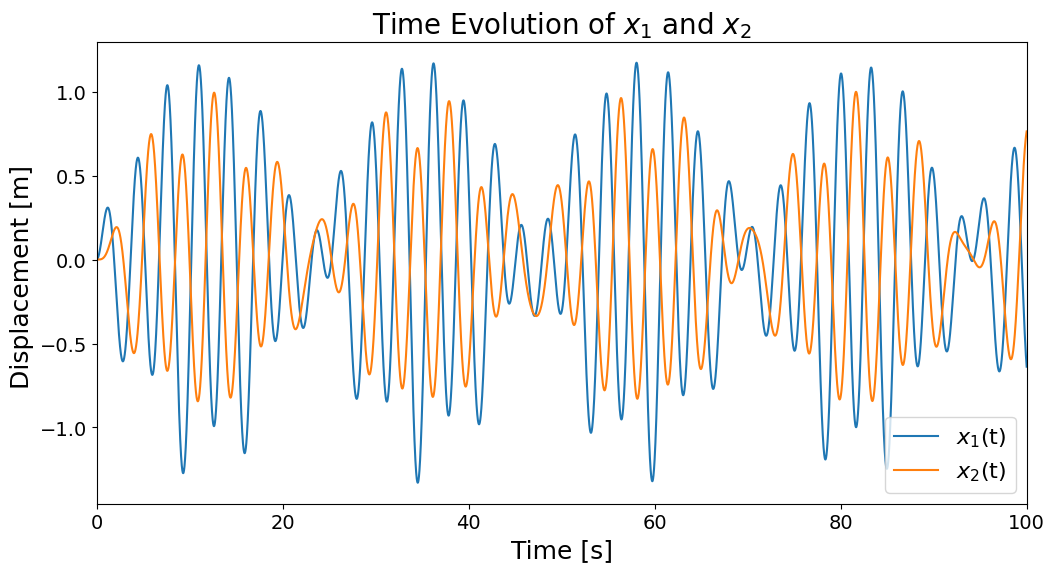

In [34]:
x1, x2 = velocity_verlet(0, 0, 0, 0, dt, f0, 2*k/m, k, m, N)

# Plot the time evolution of x1 and x2
time = np.linspace(0, T, N)
plt.figure(figsize=(12,6))
plt.plot(time, x1, label="$x_1$(t)")
plt.plot(time, x2, label="$x_2$(t)")
plt.xlabel("Time [s]")
plt.ylabel("Displacement [m] ")
plt.legend()
plt.title("Time Evolution of $x_1$ and $x_2$")
plt.xlim(0,T)

plt.savefig("Plots_01/c_time_evolution.png")
plt.show()


# Write the time evolution data to a CSV file
with open('Data_01/c_time_evolution_data.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    
    # Write the header
    writer.writerow(['Time', 'x1', 'x2'])
    
    # Write the data rows
    for t, x1_val, x2_val in zip(time, x1, x2):
        writer.writerow([t, x1_val, x2_val])

# 1d

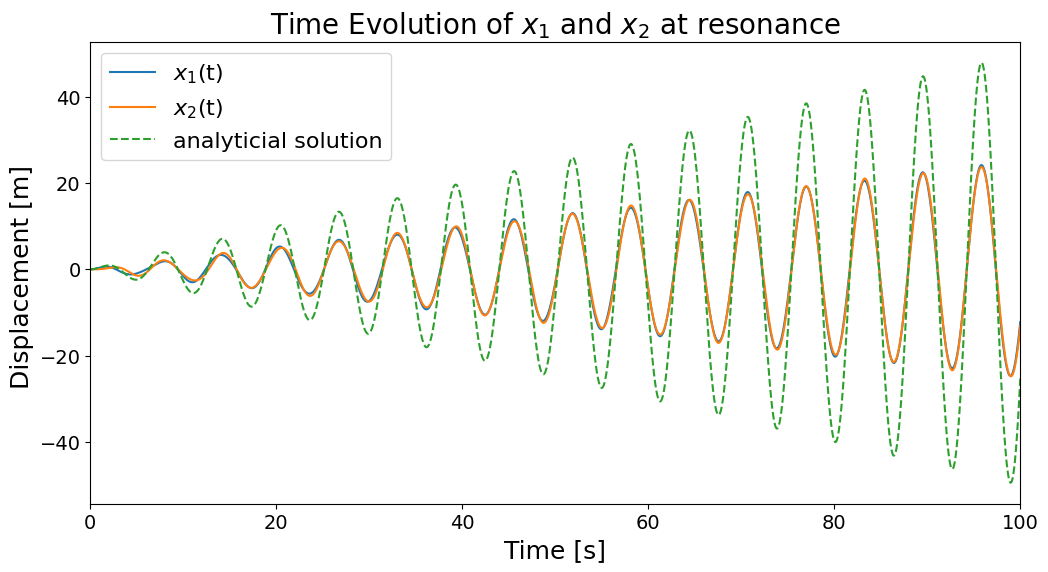

In [29]:
x1, x2 = velocity_verlet(0, 0, 0, 0, dt, f0, k/m, k, m, N)

# Plot the time evolution of x1 and x2
time = np.linspace(0, T, N)
plt.figure(figsize=(12,6))
plt.plot(time, x1, label="$x_1$(t)")
plt.plot(time, x2, label="$x_2$(t)")
plt.plot(time, time/2*np.sin(time), label= "analyticial solution", linestyle = 'dashed')
plt.xlabel("Time [s]")
plt.ylabel("Displacement [m] ")
plt.legend()
plt.title("Time Evolution of $x_1$ and $x_2$ at resonance")
plt.xlim(0,T)

plt.savefig("Plots_01/d_time_evolution_resonance.png")
plt.show()


# Write the time evolution data to a CSV file
with open('Data_01/c_time_evolution_data.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    
    # Write the header
    writer.writerow(['Time', 'x1', 'x2'])
    
    # Write the data rows
    for t, x1_val, x2_val in zip(time, x1, x2):
        writer.writerow([t, x1_val, x2_val])

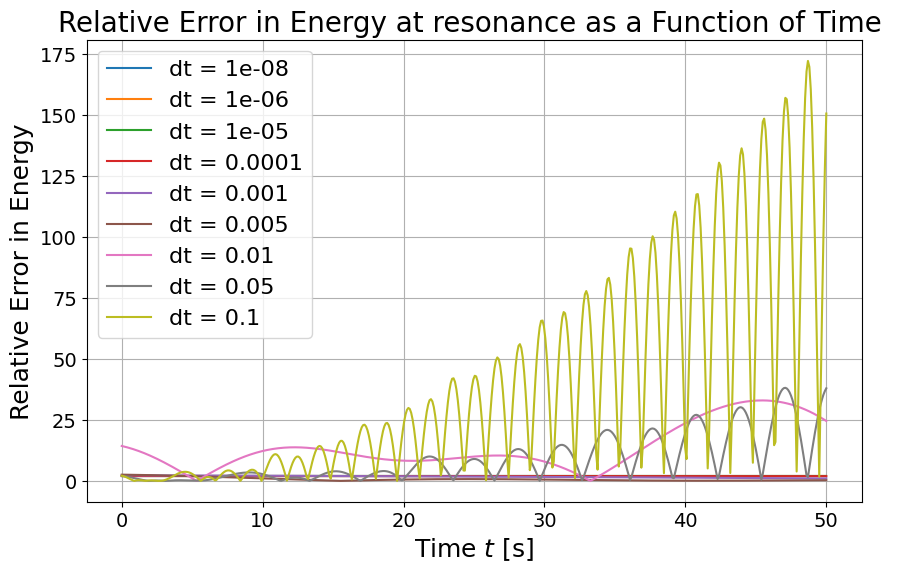

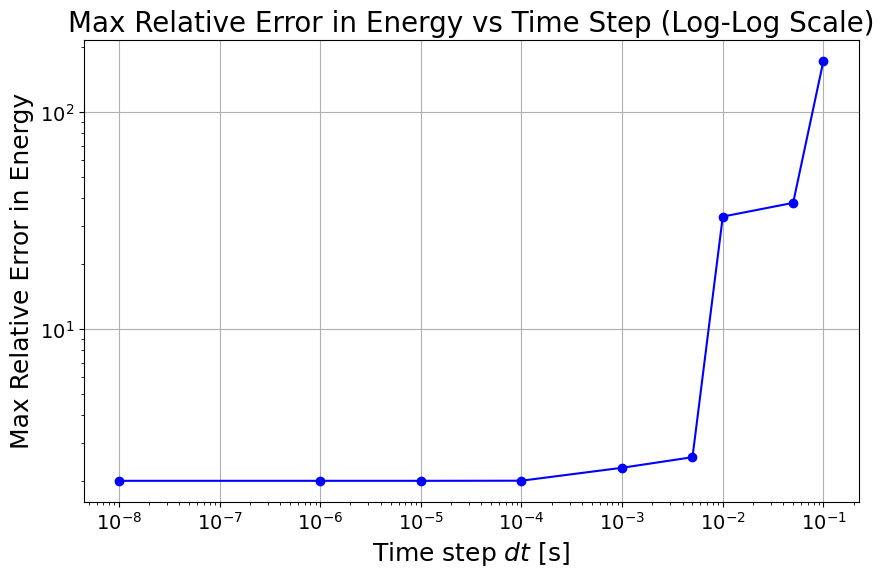

In [27]:
# Define system parameters for error calc
omega = 1.0  # Natural frequency of the system (resonant frequency)
mass = 1.0   # Mass (for simplicity, set to 1)
k = mass * omega**2  # Spring constant (k = m * omega^2)

# Define initial conditions
x0 = 1.0  # Initial position (starting from a nonzero displacement for simplicity)
v0 = 0.0  # Initial velocity (starting from rest)
y0 = 0.0  # Initial position of y
vy0 = 0.0  # Initial velocity of y

# Velocity Verlet integrator for energy calc at resonance
def velocity_verlet_energy(x, v, y, vy, dt, num_steps):
    # Initialize arrays to store the positions, velocities, and energies
    x_vals = np.zeros(num_steps)
    v_vals = np.zeros(num_steps)
    y_vals = np.zeros(num_steps)
    vy_vals = np.zeros(num_steps)
    energy_vals = np.zeros(num_steps)
    
    # Set initial values
    x_vals[0] = x
    v_vals[0] = v
    y_vals[0] = y
    vy_vals[0] = vy
    # Initial energy: kinetic + potential energy
    energy_vals[0] = 0.5 * (v**2 + vy**2) + 0.5 * (-2 * x**2 - 2 * y**2 + 2 * x * y)
    
    for i in range(1, num_steps):
        # External force (cos(t)) is applied to the x equation
        external_force = np.cos(i * dt)
        
        # Update positions and velocities using the velocity Verlet algorithm
        x_new = x + v * dt + 0.5 * (-2 * x + y + external_force) * dt**2
        y_new = y + vy * dt + 0.5 * (x - 2 * y) * dt**2
        
        v_new = v + 0.5 * (-2 * x + y + external_force + (-2 * x_new + y_new + external_force)) * dt
        vy_new = vy + 0.5 * (x - 2 * y + (x_new - 2 * y_new)) * dt
        
        # Update x, v, y, vy for the next iteration
        x, v = x_new, v_new
        y, vy = y_new, vy_new
        
        # Store values for energy calculation
        x_vals[i] = x
        v_vals[i] = v
        y_vals[i] = y
        vy_vals[i] = vy
        
        # Compute total energy
        kinetic_energy = 0.5 * (v**2 + vy**2)
        potential_energy = 0.5 * (-2 * x**2 - 2 * y**2 + 2 * x * y)
        work_done_by_force = np.sin(i * dt)  # Integral of cos(t) is sin(t)
        energy_vals[i] = kinetic_energy + potential_energy + work_done_by_force
        energy_analytical = analytical_energy(i*dt, 1, 1)
        
    return x_vals, v_vals, y_vals, vy_vals, energy_vals, energy_analytical

# Simulation parameters
dt_values = [1e-8,1e-6,1e-5,1e-4,1e-3,5e-3,1e-2,0.05,0.1]  # Different time steps for testing
num_steps = 500  # Number of time steps
t = np.linspace(0, num_steps * max(dt_values), num_steps)

# Plot the relative error in energy for different time steps
plt.figure(figsize=(10, 6))

# Store the maximum relative errors for each time step
relative_errors = []

for dt in dt_values:
    # Run the simulation using the velocity Verlet integrator
    x_vals, v_vals, y_vals, vy_vals, energy_vals, energy_analytical = velocity_verlet_energy(x0, v0, y0, vy0, dt, num_steps)
    
    # Compute the relative error in energy at each time step (absolute error)
    relative_errors_at_each_time = np.abs(energy_vals - energy_analytical) / energy_analytical
    
    # Track the maximum relative error over all time steps
    max_relative_error = np.max(relative_errors_at_each_time)
    
    # Plot the relative error in energy over time (relative error vs time)
    plt.plot(t, relative_errors_at_each_time, label=f"dt = {dt}")
    
    # Store the maximum relative error for this dt value (for the log-log plot)
    relative_errors.append(max_relative_error)

    with open(f"Data_01/relative_error_dt_{dt:.1e}.csv", mode="w", newline="") as file:
        writer = csv.writer(file)
        writer.writerow(["Time", "Relative Error"])
        writer.writerows(zip(t, relative_errors_at_each_time))


# Save max relative errors vs time steps to CSV
with open("Data_01/max_relative_error_vs_timestep.csv", mode="w", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(["Time Step (dt)", "Max Relative Error"])
    writer.writerows(zip(dt_values, relative_errors))

# Plot settings for the first plot (Relative Error in Energy vs Time)
plt.xlabel("Time $t$ [s]")
plt.ylabel("Relative Error in Energy")
plt.title("Relative Error in Energy at resonance as a Function of Time ")
plt.legend()
plt.grid(True)
plt.savefig("Plots_01/d_relative_error_over_time.png")
plt.show()

# Ensure there are no zero values for the log-log plot as this causes errors
relative_errors = [max(err, 1e-10) for err in relative_errors]

# Plot the maximum relative error vs time step on a log-log scale
plt.figure(figsize=(10, 6))
plt.loglog(dt_values, relative_errors, marker='o', linestyle='-', color='b')

plt.xlabel("Time step $dt$ [s]")
plt.ylabel("Max Relative Error in Energy")
plt.title("Max Relative Error in Energy vs Time Step (Log-Log Scale)")
plt.grid(True)
plt.savefig("Plots_01/d_dependence_on_time_step.png")
plt.show()

# 1e

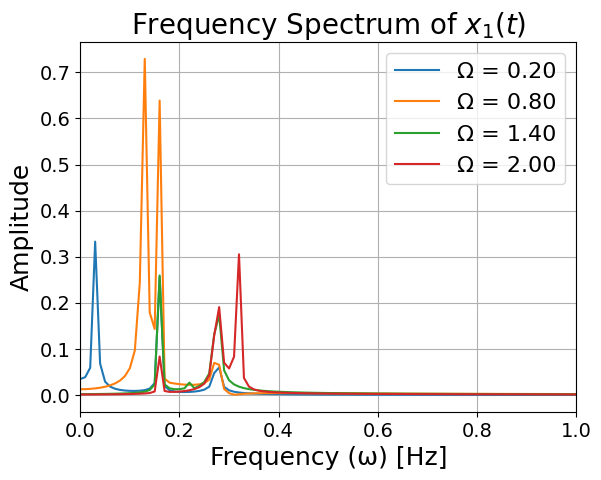

In [60]:
omega_drive_values = np.linspace(0.2, 2.0, 4)

plt.figure()
dt = 1e-3

# Prepare a list to store data for the CSV file
csv_data = [["Frequency"] + [f"Amplitude_omega_{omega:.2f}" for omega in omega_drive_values]]

for omega in omega_drive_values:
    # Perform simulation and FFT analysis
    x1, x2 = velocity_verlet(0, 0, 0, 0, dt, f0, omega, k, m, N)
    freq, spectrum = fft_analysis(x1, dt)

    # Plot the spectrum
    plt.plot(freq, spectrum, label=f"Ω = {omega:.2f}")

    # Add the frequency and spectrum to the CSV data
    if len(csv_data) == 1:  # Add frequencies only once
        csv_data.extend([[f, s] for f, s in zip(freq, spectrum)])
    else:  # Append only amplitudes
        for i, s in enumerate(spectrum):
            csv_data[i + 1].append(s)

plt.xlabel("Frequency (ω) [Hz]")
plt.ylabel("Amplitude")
plt.xlim(0, 1)
plt.grid()
#plt.axvline(x=np.sqrt(k / m), color='r', linestyle='--', label=r"$\sqrt{k/m}$")
plt.title("Frequency Spectrum of $x_1(t)$")
plt.legend()
plt.savefig("Plots_01/e_freq_spectrum.png")
plt.show()

# Write the data to a CSV file
with open("Data_01/e_frequency_spectrum.csv", mode="w", newline="") as file:
    writer = csv.writer(file)
    writer.writerows(csv_data)